In [20]:
import numpy as np
import os
import sys
currentdir = os.path.dirname(os.path.realpath('__file__'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from dataset import Dataset
from tools import distance,new_seed,execution_time
import matplotlib.pyplot as plt
from  nearest_neighbor_search import NNS

from akll import AKLL
from kll import KLL
from functools import wraps
from time import time

In [21]:
dataset_name = 'test_2.csv'
dataset_path=f'{parentdir}/dataset/{dataset_name}'
x = Dataset(dataset_path)

C:\Users\Mohammad\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


func:fit took: 0.0010004043579101562 sec
func:fit took: 2.615462064743042 sec


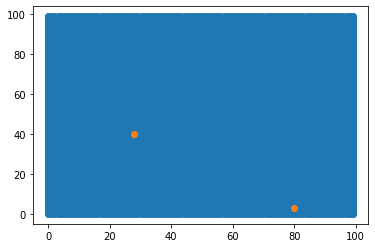

In [22]:
t=AKLL(x)
c=t.fit(2,5,4)
plt.scatter(t.X[:,0],t.X[:,1])
plt.scatter(c[:,0],c[:,1])

In [4]:
# algorithm 1 K-Means++
class kpp:
    

    def __init__(
        self,
        dataset:Dataset
        )->None:

        
        self.dataset = dataset
        self.n=dataset.number_of_sample
        self.d=dataset.number_of_feature
        self.X=dataset.sample
        self.m = None
        self.K=None


    
    def fit(
        self,
        number_of_cluster:int ,
        sample_weight:np.ndarray=None
        )->np.ndarray:
        
        self.m=np.empty((0, self.d))
        self.K=number_of_cluster


            
        assert self.n>self.K and self.K >0 ,\
            'number of cluster should be in range [1,n)' 
            
        if sample_weight is not None:
            self.sample_weight=np.array(sample_weight)
        else:
            self.sample_weight=np.ones(self.n)
       
        self.sample_weight=self.sample_weight.reshape((-1,1)) 
        # line 1
        beta=self.sample_weight/np.sum(self.sample_weight)
        # line 2

        m=np.vstack((self.m,new_seed(self.X,1,beta)))
        # line 3
        alpha=np.array([np.inf]*self.n).reshape((-1,1))
        k=1
        # line 4
        while k <self.K:
            # line 5,6
            alpha=np.minimum(alpha,distance(self.X,m[k-1]))
            # line 7,8
            t=self.sample_weight*(alpha**2)
            beta=t/np.sum(t)
            # line 9
            k+=1
            # line 10
            m=np.vstack((m,new_seed(self.X,1,beta)))
        self.m=m
        # line 11
        return np.array(m)
    
    

In [5]:
t=kpp(x)


In [6]:
t.fit(-2)

AssertionError: number of cluster should be in range [1,n)

In [ ]:

m=np.empty((0,t.d))
m=np.vstack((m,new_seed(t.X,1,beta)))
m=np.vstack((m,new_seed(t.X,1,beta)))
m=np.vstack((m,new_seed(t.X,1,beta)))
m

array([[2., 0.],
       [2., 3.],
       [3., 3.]])

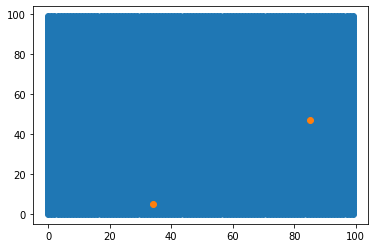

In [ ]:
t=kll()
c=t.fit(2)
plt.scatter(t.X[:,0],t.X[:,1])
plt.scatter(c[:,0],c[:,1])

In [ ]:
c=np.array([[0,0],[2,2]])

In [ ]:
j=np.array([[0,2],[0,4]])

In [ ]:
np.linalg.norm(c[:,None,:]-j,axis=2)  

array([[2.        , 4.        ],
       [2.        , 2.82842712]])

In [ ]:
j=np.empty(5)

In [26]:
def execution_time2(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print(f"func:{f.__name__} class:{f.__qualname__} took: {te-ts} sec")

        return result

    return wrap
    
@execution_time2
def runner(iter:int,k:int):
    dis = []
    for i in range(iter):
        
        t.fit(k,5,k*2)
        dis.append(distance(t.c[0], t.c[1]))
    # plt.scatter(akpp.X[:, 0], akpp.X[:, 1])
    # plt.scatter(akpp.m[:, 0], akpp.m[:, 1])
    # plt.show()
    return np.mean(dis)


class Computer:

    def __init__(self,cpu):
        self.cpu = cpu
    @execution_time2
    def speed(self):
        z=(1000//self.cpu)
        for i in range(z):
            pass

c=Computer(10)
c.speed()

func:speed class:Computer.speed took: 0.0 sec


In [ ]:
beta=t.sample_weight/np.sum(t.sample_weight)
new_seed(x.sample,1,beta).shape

(1, 2)

In [15]:
t=AKLL(x)
# c=t.fit(2,5,4)
runner(10,2)

C:\Users\Mohammad\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


func:fit took: 0.0 sec
func:fit took: 2.1938443183898926 sec
func:fit took: 0.0 sec
func:fit took: 2.4001336097717285 sec
func:fit took: 0.001001119613647461 sec
func:fit took: 2.189887046813965 sec
func:fit took: 0.0 sec
func:fit took: 2.1989362239837646 sec
func:fit took: 0.0 sec
func:fit took: 1.9800918102264404 sec
func:fit took: 0.0 sec
func:fit took: 1.9474167823791504 sec
func:fit took: 0.0009822845458984375 sec
func:fit took: 2.086505651473999 sec
func:fit took: 0.0 sec
func:fit took: 2.056624412536621 sec
func:fit took: 0.0 sec
func:fit took: 2.013970375061035 sec
func:fit took: 0.0 sec
func:fit took: 1.750138759613037 sec
func:runnerclass:<class 'function'> took: 20.819533824920654 sec


72.04552727230809

In [ ]:
c=np.array([1,2,3])
j=np.array([4,1,6])

In [ ]:
c*j**2/np.sum(c*j**2)

array([0.12698413, 0.01587302, 0.85714286])

In [ ]:
# %%file kll.py
# import numpy as np
# from dataset import Dataset
# from tools import distance, new_seed, execution_time


# algorithm 3 K-Means ||
class kll:
    def __init__(self, dataset: Dataset) -> None:
        self.dataset = dataset
        self.n = dataset.number_of_sample
        self.d = dataset.number_of_feature
        self.X = dataset.sample
        self.c = None
        self.K = None
        self.R = None
        self.l = None

    @execution_time
    def fit(
            self, number_of_cluster: int,
            rounds:int=5,
            oversampling_factor:int=1,
            sample_weight: np.ndarray = None) -> np.ndarray:

        self.c = np.empty((0, self.d))
        self.K = number_of_cluster
        self.R = rounds
        self.l = oversampling_factor

        assert self.R>0 and self.l>0 , \
            'invalid function parameter'
        assert self.n>self.K and self.K >0 ,\
            'number of cluster should be in range [1,n)' 

        if sample_weight is not None:
            self.sample_weight = np.array(sample_weight)
        else:
            self.sample_weight = np.ones(self.n)
       
        self.sample_weight = self.sample_weight.reshape((-1, 1))
        # line 1 algorithm 1
        beta = self.sample_weight/np.sum(self.sample_weight)
        # line 2 algorithm 1
        c = np.vstack((self.c, new_seed(self.X, 1, beta)))
        # line 3 algorithm 1
        alpha = np.array([np.inf]*self.n).reshape((-1, 1))
        k = 1
        kp = 0
        # line 4,5,6 algorithm 1
        for r in range(self.R):
            for i in range(self.n):
                for j in range(kp,k):
                    # line 7 algorithm 1
                    alpha[i] = np.minimum(
                        alpha[i], distance(self.X[i], c[j]))

            # line 8,9 algorithm 1
            kp = k
            t = self.sample_weight*(alpha**2)
            z = np.sum(t)
            # line 10,11,12 algorithm 3
            for i in range(self.n):
                p=(self.l*self.sample_weight[i]*(alpha[i]**2)/z)
                if p > np.random.rand(1)[0]:
                    k+=1
                    c=np.vstack((c, self.X[i]))
                    alpha[i]=0
       
        # line 13 algorithm 3
        wp=np.empty((0,1))
        for i in range(c.shape[0]):
            s=0
            for j in range(self.n):
                wj=self.sample_weight[j]
                indic= 1 if distance(self.X[j], c[i])==alpha[j] else 0
                s+=wj*indic
           
            wp=np.vstack((wp,s))
        self.c=c
        # line 14 algorithm 3
        kpp_=kpp(Dataset(np.array(c)))

        return kpp_.fit(self.K,wp)
            

# t=kll(x)
# c=t.fit(2,5,4)
# plt.scatter(t.X[:,0],t.X[:,1])
# plt.scatter(c[:,0],c[:,1])


Writing kll.py


In [ ]:
assert -1   , ' heeee'

In [ ]:
x.number_of_sample

25

In [ ]:
def encode(y):            
    return (np.arange(np.unique(y).size) == y)

In [ ]:
encode()

C:\Users\Mohammad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


False

In [ ]:
if 1==1 :

C:\Users\Mohammad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [ ]:
d= 1 if 3==5 else 0
d

0

In [ ]:
g=distance(x.sample[1], x.sample[5])

In [ ]:
1 if g>np.array([[1]]) else 0

1

In [ ]:
g

array([[1.41421356]])

In [ ]:
y=np.array([[1,2],[3,4]])
# Dataset(y)
x=Dataset(y)

In [ ]:
x.number_of_feature

2

In [ ]:
f=np.empty((0,2))

In [ ]:
f

array([], shape=(0, 20), dtype=float64)

In [ ]:
f=np.vstack((f,np.array([1,2])))

In [ ]:
f

array([[1., 2.]])

In [ ]:
import numpy as np
from dataset import Dataset
from tools import distance, new_seed, execution_time
import kpp


# algorithm 5 Accelerated K-Means ||
class Akll:
    def __init__(self, dataset: Dataset) -> None:
        self.dataset = dataset
        self.n = dataset.number_of_sample
        self.d = dataset.number_of_feature
        self.X = dataset.sample
        self.c = None
        self.K = None
        self.R = None
        self.L = None

    @execution_time
    def fit(
        self,
        number_of_cluster: int,
        rounds: int = 5,
        oversampling_factor: int = 1,
        sample_weight: np.ndarray = None,
    ) -> np.ndarray:

        self.c = np.empty((0, self.d))
        self.K = number_of_cluster
        self.R = rounds
        self.L = oversampling_factor

        assert self.R > 0 and self.L > 0, "invalid function parameter"
        assert (
            self.n > self.K and self.K > 0
        ), "number of cluster should be in range [1,n)"

        if sample_weight is not None:
            self.sample_weight = np.array(sample_weight)
        else:
            self.sample_weight = np.ones(self.n)

        self.sample_weight = self.sample_weight.reshape((-1, 1))
        # line 1 algorithm 5
        beta = self.sample_weight / np.sum(self.sample_weight)
        # line 2 algorithm 5
        c = np.vstack((self.c, new_seed(self.X, 1, beta)))
        # line 3 algorithm 5
        alpha = np.array([np.inf] * self.n).reshape((-1, 1))
        k = 1
        kp = 0
        # line 4 algorithm 5
        for r in range(self.R):
            # line  5, 6,7 algorithm 5
            #  C ← new index built from {ckprev, . . . , ck }
            for i in range(self.n):
                j=None # j=C.nearestinrange(xi,ai)
                # line 8,9 algorithm 5
                if j>=0:
                    alpha[i] = distance(self.X[i], c[j])

            # line 10 algorithm 5
            kp = k
            t = self.sample_weight * (alpha**2)
            z = np.sum(t)
            # line 11,12,13 algorithm 5
            for i in range(self.n):
                p = self.L * self.sample_weight[i] * (alpha[i] ** 2) / z
                if p > np.random.rand(1)[0]:
                    k += 1
                    c = np.vstack((c, self.X[i]))
                    alpha[i] = 0

        # line 14 algorithm 5
        wp = np.empty((0, 1))
        for i in range(c.shape[0]):
            s = 0
            for j in range(self.n):
                wj = self.sample_weight[j]
                indic = 1 if distance(self.X[j], c[i]) == alpha[j] else 0
                s += wj * indic

            wp = np.vstack((wp, s))
        self.c = c
        # line 15 algorithm 5
        kpp_ = kpp(Dataset(np.array(c)))

        return kpp_.fit(self.K, wp)


In [ ]:
import vptree

# Define distance function.
def euclidean(p1, p2):
  return np.sqrt(np.sum(np.power(p2 - p1, 2)))

# Generate some random points.
points = np.random.randn(20, 2)
query = [0] * 2

# Build tree in O(n log n) time complexity.
tree = vptree.VPTree(points, euclidean)

# Query single point.
res=tree.get_nearest_neighbor(query)

# Query n-points.
# tree.get_n_nearest_neighbors(query, 10)

# Get all points within certain distance.
# tree.get_all_in_range(query, 3.14)

In [ ]:
points

array([[-2.16407186, -2.18319461],
       [-1.34508428,  1.50288073],
       [-1.68862182, -0.2000634 ],
       [ 0.13335667, -0.90264669],
       [-0.77134759,  1.37950545],
       [ 0.24889514,  0.62063311],
       [ 0.80558597, -0.13477106],
       [-1.82859245,  0.47754931],
       [-0.77525922, -0.29171861],
       [-0.14115441, -0.0444899 ],
       [-2.68506889,  1.35406943],
       [-2.01349752, -0.19993574],
       [ 0.85005865,  0.607197  ],
       [-0.66341392, -0.67362096],
       [-0.74121948,  1.2939336 ],
       [-0.52856687,  1.33391419],
       [-1.18189318, -0.38073969],
       [-1.31870001,  0.90299699],
       [-0.16970442,  0.71759648],
       [ 1.88940594,  0.81402993]])

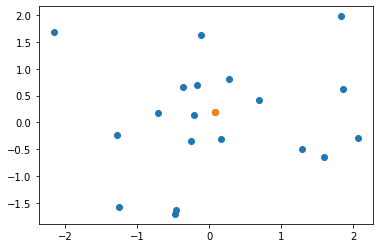

In [ ]:
plt.scatter(points[:,0],points[:,1])
plt.scatter(res[1][0],res[1][1])

In [ ]:
import copy


def g(tree):
    return copy.deepcopy(tree)
y=g(tree)


In [ ]:
y=g(tree)
while True: 

    right=y.right
    if not right:
        break

    print(right.vp)

    y=right

[ 2.32703691 -0.49282275]
[-0.74254477  2.23013928]
[ 0.17292991 -2.47294688]
[ 0.73360469 -2.28962849]


In [ ]:
def test(x):
    yield 12
    yield 13
    

In [ ]:
c=list(test(3))

In [ ]:
c

[12, 13]

In [ ]:
c

[12, 13]